# Basic LSTM
<img src='image/LSTM.png' width=70% height=70% />

## Perform standard imports

In [66]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Create a Cos wave dataset


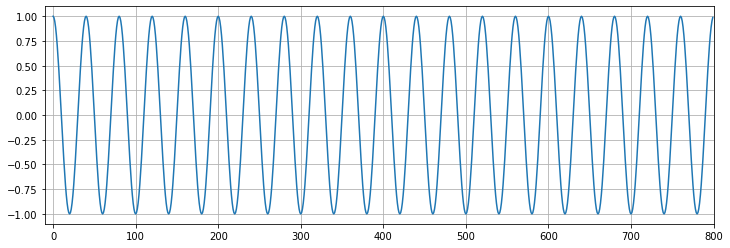

In [67]:
# Create & plot data points
x = torch.linspace(0,799,steps=800)
y = torch.cos(x*2*np.pi/40)

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy());

## Create train and test sets

In [68]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

## Prepare the training data based on sequence
When working with LSTM models, we start by dividing the training sequence into a series of overlapping "windows". The label used for comparison is equal to the next value in the sequence. In this way our network learns what value should follow a given pattern of preceding values. 

Note: although the LSTM layer produces a prediction for each sample in the window, we only care about the last one.

For example, say we have a series of 20 records, and a window size of 5. We feed $[x_1,..,x_5]$ into the model, and compare the prediction to $x_6$. Then we backprop, update parameters, and feed $[x_2,..,x_6]$ into the model. We compare the new output to $x_7$ and so forth up to $[x_{15},..,x_{19}]$.

To simplify matters, we'll define a function called <tt>input_data</tt> that builds a list of <tt>(seq, label)</tt> tuples. Windows overlap, so the first tuple might contain $([x_1,..,x_5],[x_6])$, the second would have $([x_2,..,x_6],[x_7])$, etc. 

In [69]:
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out
# ([0,1,2,3,4,..39],[40]), ([1,2,3,4,5],[6]) ,

In [70]:
window_size = 40

# Create the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

In [71]:
len(train_data)

720

In [72]:
# Display the first (seq/label) tuple in train_data
train_data[-1]

(tensor([     0.9877,      1.0000,      0.9877,      0.9511,      0.8910,
              0.8090,      0.7071,      0.5878,      0.4540,      0.3090,
              0.1564,     -0.0000,     -0.1564,     -0.3090,     -0.4540,
             -0.5878,     -0.7071,     -0.8090,     -0.8910,     -0.9511,
             -0.9877,     -1.0000,     -0.9877,     -0.9511,     -0.8910,
             -0.8090,     -0.7071,     -0.5878,     -0.4540,     -0.3090,
             -0.1564,      0.0000,      0.1564,      0.3090,      0.4540,
              0.5878,      0.7071,      0.8090,      0.8910,      0.9511]),
 tensor([0.9877]))

In [73]:
# to improve the appearance of tensors sci_mode=False
torch.set_printoptions(sci_mode=False) 
train_data[-1]

(tensor([     0.9877,      1.0000,      0.9877,      0.9511,      0.8910,
              0.8090,      0.7071,      0.5878,      0.4540,      0.3090,
              0.1564,     -0.0000,     -0.1564,     -0.3090,     -0.4540,
             -0.5878,     -0.7071,     -0.8090,     -0.8910,     -0.9511,
             -0.9877,     -1.0000,     -0.9877,     -0.9511,     -0.8910,
             -0.8090,     -0.7071,     -0.5878,     -0.4540,     -0.3090,
             -0.1564,      0.0000,      0.1564,      0.3090,      0.4540,
              0.5878,      0.7071,      0.8090,      0.8910,      0.9511]),
 tensor([0.9877]))

## Define an LSTM model

In [74]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,out_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]   # we only care about the last prediction

In [75]:
torch.manual_seed(42)
model = LSTM()
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [76]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651


## Define loss & optimization functions

In [77]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Predicting future values

Epoch:  1 Loss: 0.04692294
Loss on test predictions: 0.8651154637336731


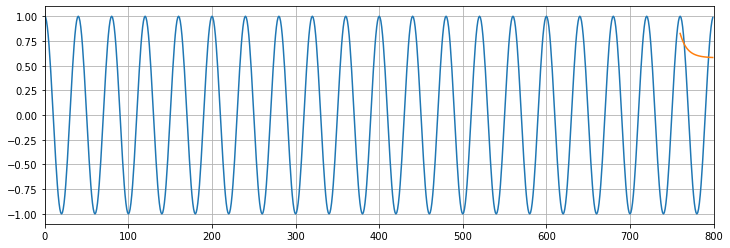

Epoch:  2 Loss: 0.02495287
Loss on test predictions: 0.9078909158706665


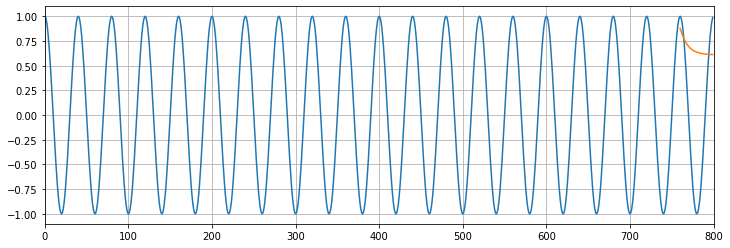

Epoch:  3 Loss: 0.01604763
Loss on test predictions: 0.8364931344985962


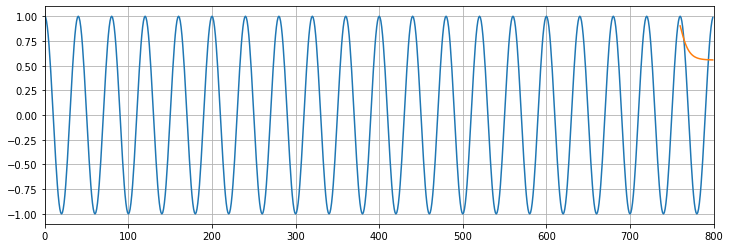

Epoch:  4 Loss: 0.00975731
Loss on test predictions: 0.614425539970398


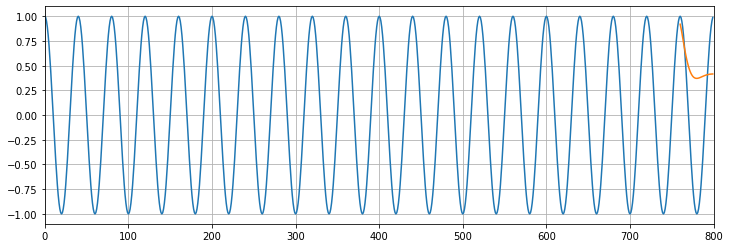

Epoch:  5 Loss: 0.00414539
Loss on test predictions: 0.2155284583568573


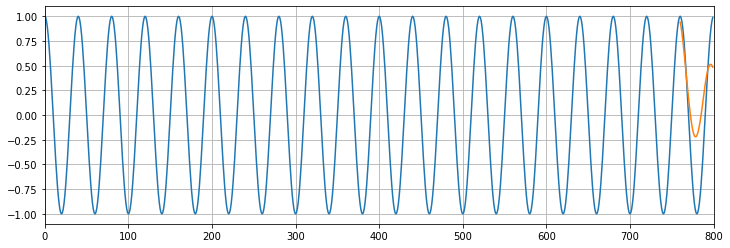

Epoch:  6 Loss: 0.00177108
Loss on test predictions: 0.021215006709098816


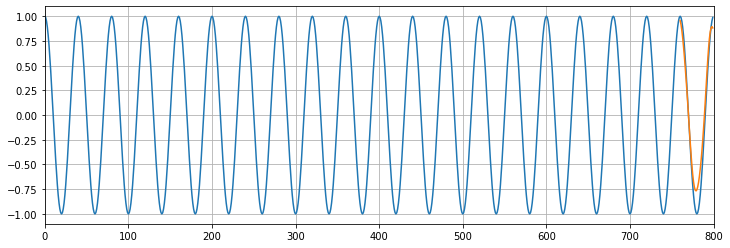

Epoch:  7 Loss: 0.00124119
Loss on test predictions: 0.005942529533058405


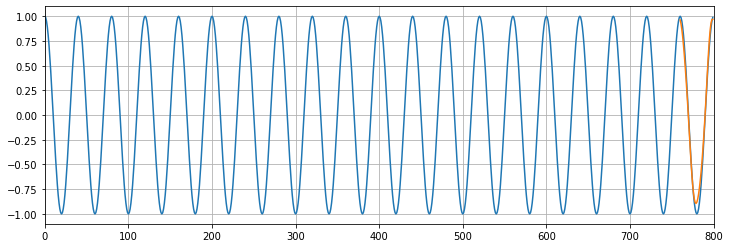

Epoch:  8 Loss: 0.00106880
Loss on test predictions: 0.004349854774773121


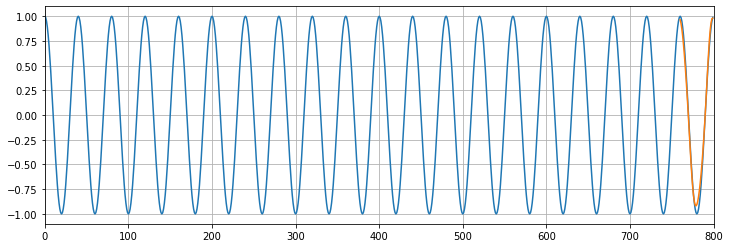

Epoch:  9 Loss: 0.00096807
Loss on test predictions: 0.003754574805498123


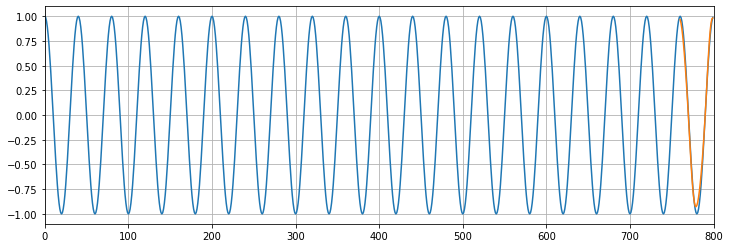

Epoch: 10 Loss: 0.00089327
Loss on test predictions: 0.0033204134088009596


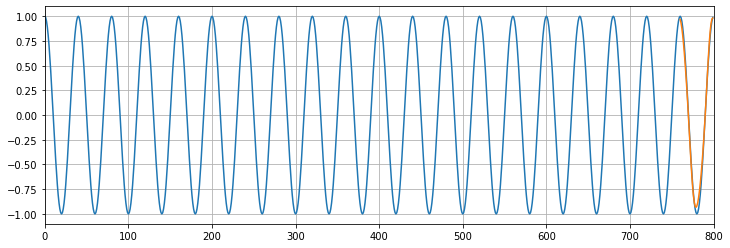

Epoch: 11 Loss: 0.00083409
Loss on test predictions: 0.0029537773225456476


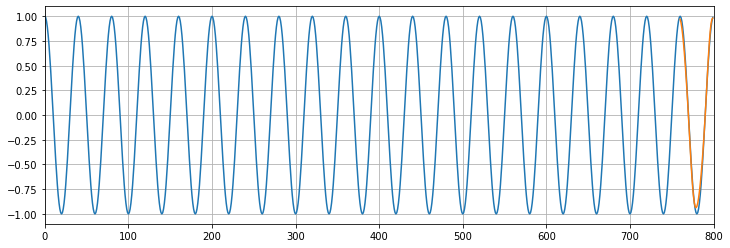

Epoch: 12 Loss: 0.00078614
Loss on test predictions: 0.002637694124132395


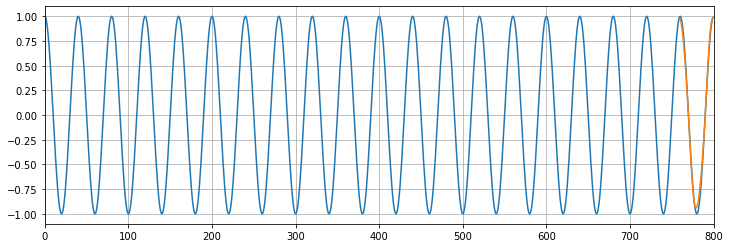

Epoch: 13 Loss: 0.00074670
Loss on test predictions: 0.002365452703088522


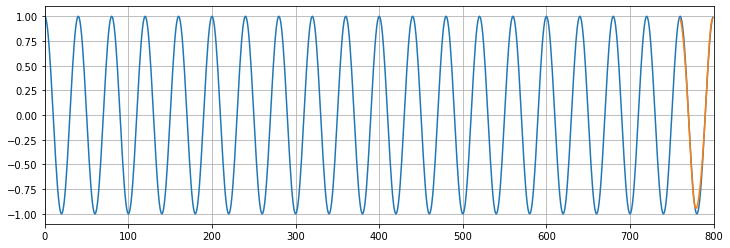

Epoch: 14 Loss: 0.00071381
Loss on test predictions: 0.0021319256629794836


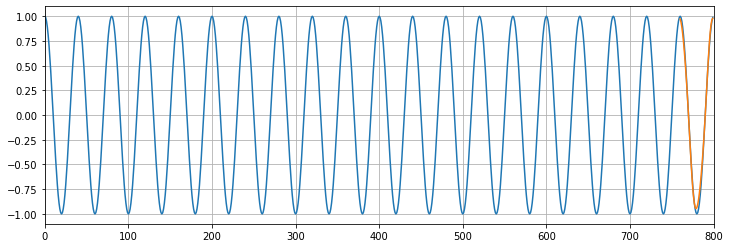

Epoch: 15 Loss: 0.00068600
Loss on test predictions: 0.0019323773449286819


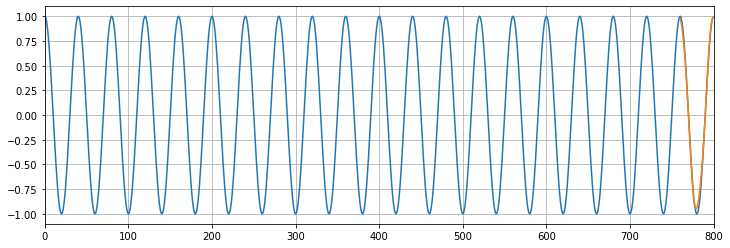

Epoch: 16 Loss: 0.00066220
Loss on test predictions: 0.0017626096960157156


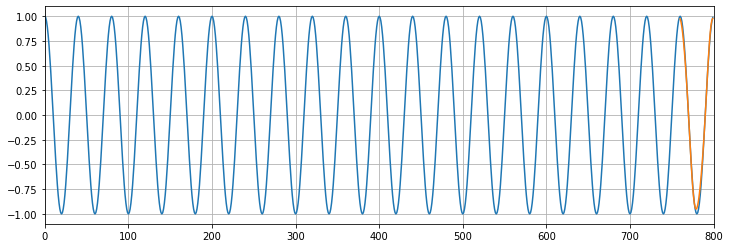

Epoch: 17 Loss: 0.00064154
Loss on test predictions: 0.001618539565242827


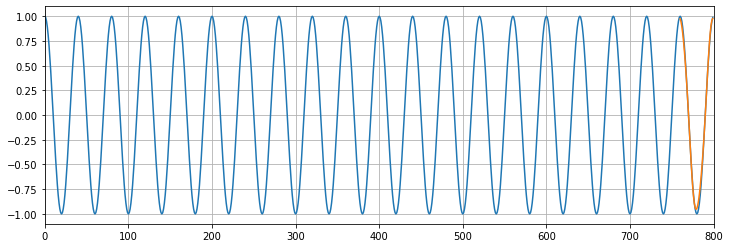

Epoch: 18 Loss: 0.00062338
Loss on test predictions: 0.0014965069713070989


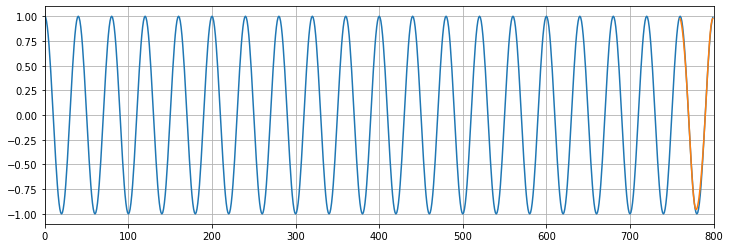

Epoch: 19 Loss: 0.00060725
Loss on test predictions: 0.00139333656989038


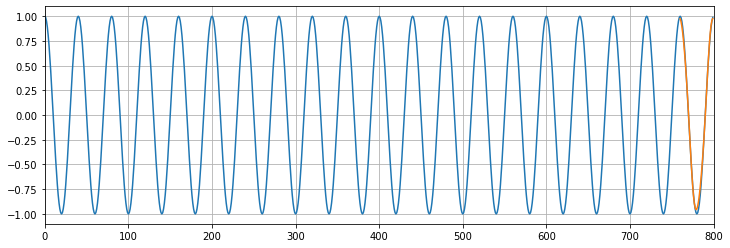

Epoch: 20 Loss: 0.00059273
Loss on test predictions: 0.0013061154168099165


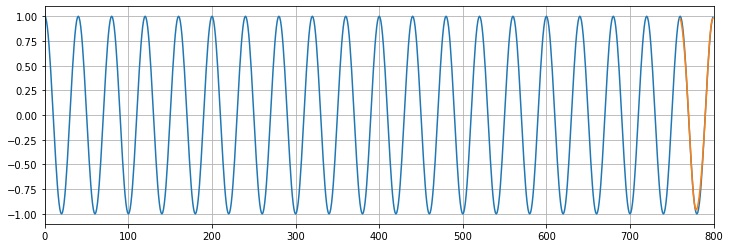

In [78]:
epochs = 20
future = 40
print_on = 1

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    if print_on == 1 :
        # Plot from point 700 to the end
        plt.figure(figsize=(12,4))
        plt.xlim(0,801)
        plt.grid(True)
        plt.plot(y.numpy())
        plt.plot(range(760,800),preds[window_size:])
        plt.show()